In [19]:
from scipy.spatial.distance import euclidean, pdist, squareform
from scipy.stats.mstats import zscore
from sklearn.preprocessing import MinMaxScaler, QuantileTransformer
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib as mpl
from pathlib import Path
#from geopy import geocoders 
import scipy, json, csv, time
import numpy as np
import pandas as pd

%matplotlib notebook

In [2]:
df = pd.read_csv('baseline_def_kaggle.csv')
df.head()

,Unnamed: 0,open,high,low,close,volume,market,close_ratio,spread,prevClose,2 Day Rolling Mean,2 Day SD,2 Day Volatility,percentChange,isEventBaseline
0,243,763.28,777.51,713.60,735.07,46862700.0,8.955395e+09,0.3359,63.91,735.07,731.45,5.119453,7.24,0.000000,False
1,244,737.98,747.06,705.35,727.83,32505800.0,8.869919e+09,0.5390,41.71,735.07,731.45,5.119453,7.24,-0.009849,False
2,245,728.05,748.61,714.44,745.05,19011300.0,9.082104e+09,0.8958,34.17,727.83,736.44,12.176379,17.22,0.023659,False
3,246,741.35,766.60,740.24,756.13,20707700.0,9.217168e+09,0.6028,26.36,745.05,750.59,7.834743,11.08,0.014871,False
4,247,760.32,760.58,738.17,754.01,20897300.0,9.191325e+09,0.7068,22.41,756.13,755.07,1.499066,2.12,-0.002804,False


In [3]:
data = df[['open', 'high', 'close', 'volume', 'market']]
#data = df[['close', 'percentChange', 'market']]
data.head()

,open,high,close,volume,market
0,763.28,777.51,735.07,46862700.0,8.955395e+09
1,737.98,747.06,727.83,32505800.0,8.869919e+09
2,728.05,748.61,745.05,19011300.0,9.082104e+09
3,741.35,766.60,756.13,20707700.0,9.217168e+09
4,760.32,760.58,754.01,20897300.0,9.191325e+09


In [7]:
def baseline_colors(x):
    if x:
        return 'Firebrick'
    else:
        return 'ForestGreen'

colors = df['isEventBaseline'].apply(baseline_colors).values

In [22]:
# Standardization
# data[:] = data[:].apply(zscore)

# Normalization
data[:] = MinMaxScaler().fit_transform(data[:])

# Quantiles
# data[:] = QuantileTransformer(n_quantiles=100, output_distribution="normal", copy=True).fit_transform(data[:])

# Manual Z-Score Pruning
# data = data.loc[(np.abs(scipy.stats.zscore(data)) < 2.0).all(axis=1)]
# data[:] = MinMaxScaler().fit_transform(data[:])


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/frame.py:3120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer(key, value)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/frame.py:3108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.

In [23]:
spatial_distance = "euclidean" # Euclidean Distance
# spatial_distance = "minkowski" # Minkowski Distance
# spatial_distance = "cityblock" # Manhattan Distance
# spatial_distance = "seuclidean" # Standardized Euclidean Distance
# spatial_distance = "cosine" # Cosine Distance

dists = pdist(df, spatial_distance)
d = pd.DataFrame(squareform(dists))
d.head()

,0,1,2,3,4,5,6,7,8,9,...,1789,1790,1791,1792,1793,1794,1795,1796,1797,1798
0,0.000000,0.204291,0.562286,0.268997,0.371109,0.473080,0.338104,0.324589,0.672993,0.507737,...,1.223329,1.241586,1.197754,1.208861,1.547707,1.225714,1.138525,1.203900,1.612270,1.159283
1,0.204291,0.000000,0.364066,0.083286,0.168603,0.276583,0.164448,0.135539,0.479027,0.340756,...,1.249777,1.186634,1.268397,1.154835,1.584136,1.167585,1.162818,1.143732,1.573656,1.149555
2,0.562286,0.364066,0.000000,0.293637,0.197553,0.089771,0.236228,0.238851,0.119790,0.164924,...,1.382809,1.163907,1.461564,1.144293,1.719276,1.140118,1.293944,1.119465,1.549777,1.215495
3,0.268997,0.083286,0.293637,0.000000,0.110827,0.204195,0.081679,0.056597,0.404692,0.258215,...,1.271769,1.170492,1.299718,1.143418,1.608086,1.150792,1.182289,1.128777,1.555986,1.151533
4,0.371109,0.168603,0.197553,0.110827,0.000000,0.114142,0.103705,0.071156,0.315064,0.219852,...,1.297404,1.160990,1.347209,1.132938,1.635452,1.139798,1.209193,1.115958,1.553853,1.164941


In [24]:
tsne_inp = np.array(d)
model = TSNE(n_components=3, n_iter=5000, perplexity=30.0)
tsne_out = model.fit_transform(tsne_inp)  
result = tsne_out.tolist()

<IPython.core.display.Javascript object>


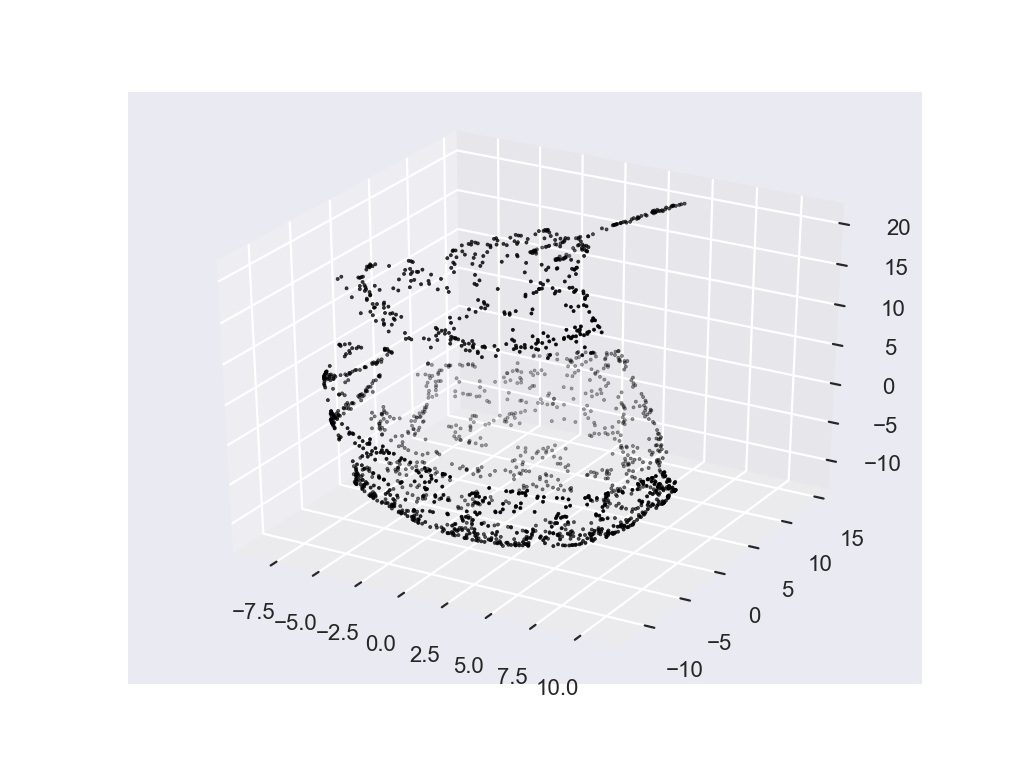

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(xs=tsne_out.T[0], ys=tsne_out.T[1], zs=tsne_out.T[2], s=2, c='black')

<IPython.core.display.Javascript object>


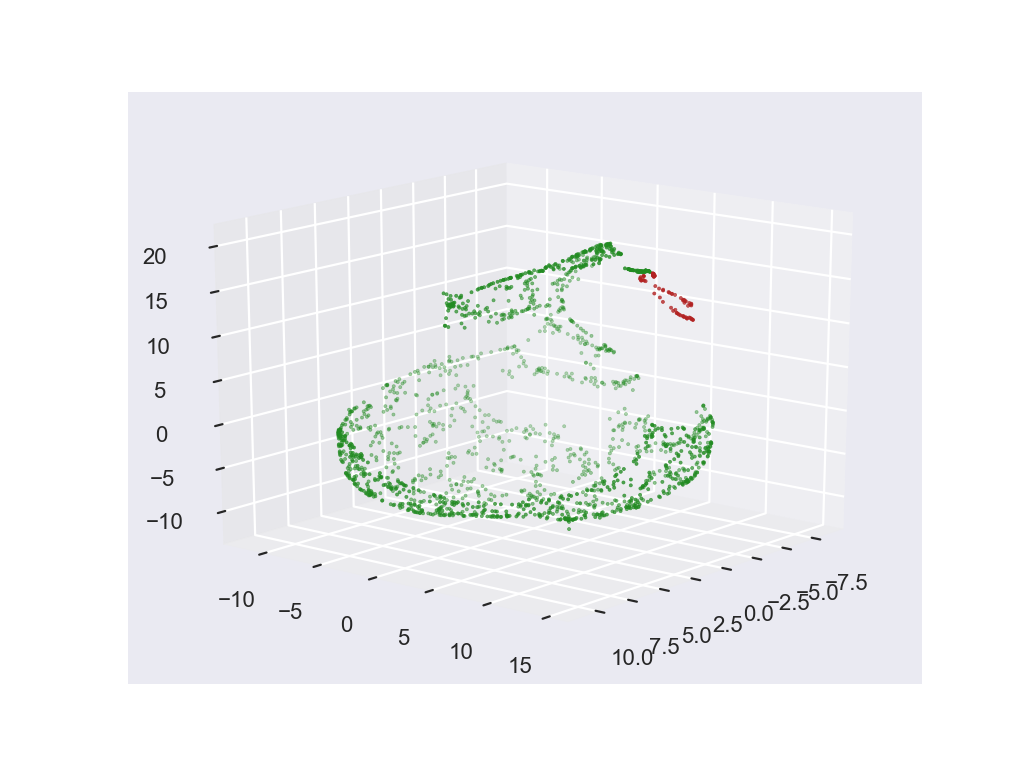

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(xs=tsne_out.T[0], ys=tsne_out.T[1], zs=tsne_out.T[2], s=2, c=colors)

<IPython.core.display.Javascript object>


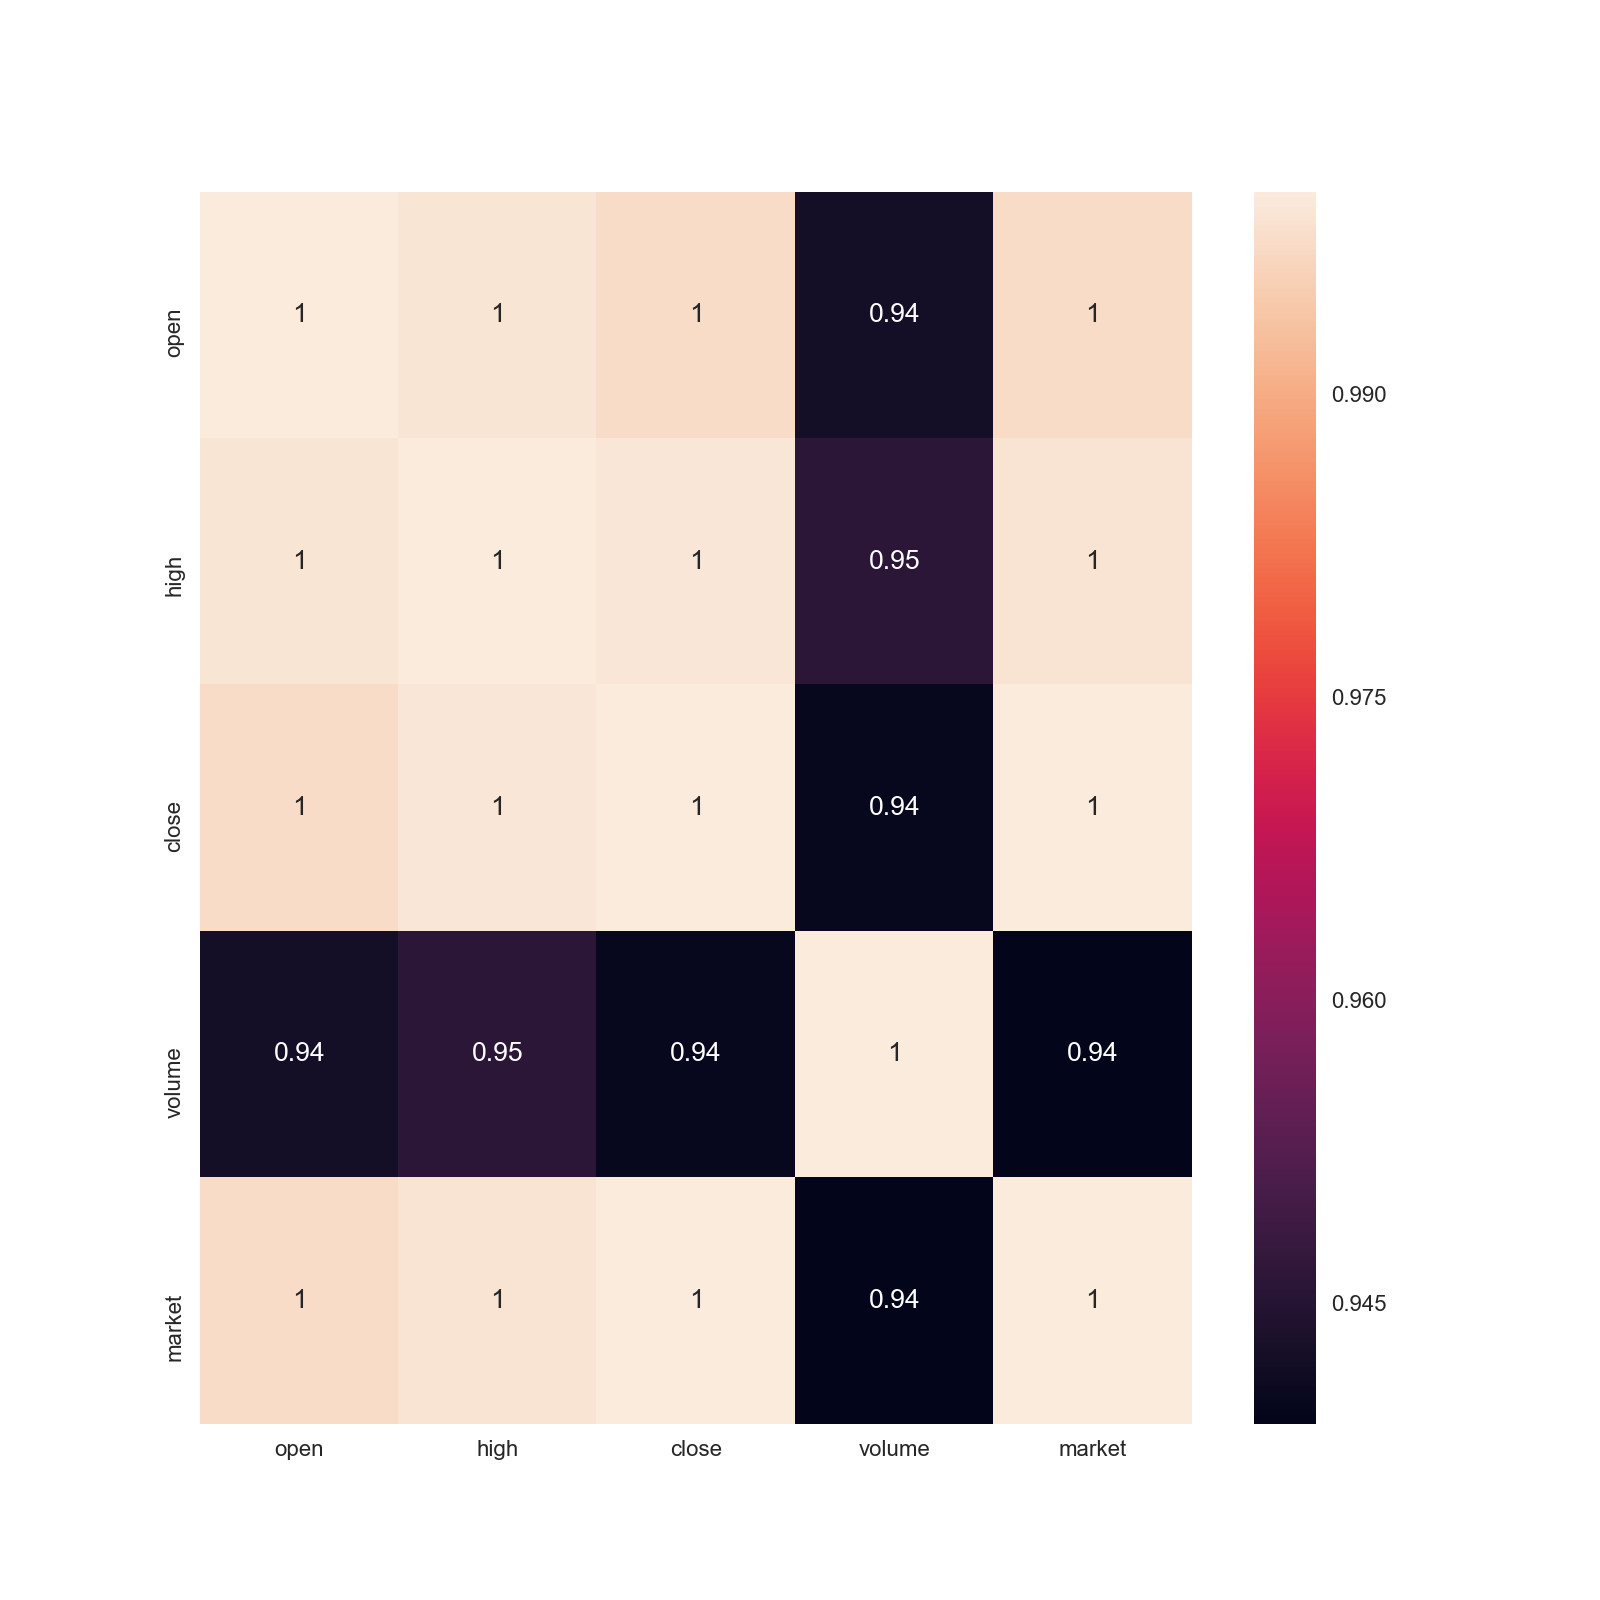

In [26]:
import seaborn as sns; sns.set()
correlations = pd.DataFrame(data=data).corr()
ax = plt.figure(figsize=(10,10))
sns.heatmap(correlations, annot=True)

In [27]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
correlations = pd.DataFrame(data=data).corr()
#feature_names = ['close', 'percentChange', 'market']
feature_names = ['open', 'high', 'close', 'volume', 'market']

pca = PCA(n_components=len(feature_names))
pca.fit(data)
reduced_data = pca.transform(data)
reduced_data = pd.DataFrame(reduced_data)

In [28]:
def pca_results(good_data, pca):
    # Using Rashid's function from visuals.py

    # Dimension indexing
    dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = good_data.keys())
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (10,10))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)


    # Display the explained variance ratios
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

In [29]:
def vis_PCA3D(color, colormap, title):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection="3d")
    # scatterplot of the reduced data    
    ax.scatter(xs=reduced_data[0], ys=reduced_data[1], zs=reduced_data[2], s=5, alpha=0.5, c=color, cmap=colormap)

    feature_vectors = pca.components_.T

    # we use scaling factors to make the arrows easier to see
    arrow_size, text_pos = 7.0, 8.0,

    # projections of the original features
    for i, v in enumerate(feature_vectors):
        ax.plot([0,arrow_size*v[0]], [0,arrow_size*v[1]], zs=[0,arrow_size*v[2]])
        ax.text(v[0]*text_pos, v[1]*text_pos, v[2]*text_pos, df.columns[i], color="black", ha="center", va="center", fontsize=10)

    ax.set_title("PC plane with original feature projections.", fontsize=16);
    ax
    #plt.savefig("/vectors3DPer{0}.png".format(title), dpi = 300)